In [249]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import zipfile
import os

In [250]:
# melakukan ekstraksi pada file zip (file disimpan di GD dan dipanggil dengan mount drive)
local_zip = '/content/drive/My Drive/tugascnn/gkb.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/gkb'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'Val')

In [251]:
# membuat direktori batu, gunting dan kertas pada direktori data training
train_b_dir = os.path.join(train_dir, 'b') 
train_g_dir = os.path.join(train_dir, 'g')
train_k_dir = os.path.join(train_dir, 'k')
 
# membuat direktori batu, gunting, dan kertas pada direktori data validasi
validation_b_dir = os.path.join(validation_dir, 'b')
validation_g_dir = os.path.join(validation_dir, 'g')
validation_k_dir = os.path.join(validation_dir, 'k')

In [252]:
#augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [253]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 150),
        color_mode="rgb",
        batch_size=12,
        interpolation="bilinear",
        )
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 150),
        color_mode="rgb",
        batch_size=12,
        interpolation="bilinear",
        )

Found 2188 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


In [255]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [256]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


In [257]:
model.fit(
      train_generator,
      steps_per_epoch=20,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2     
)

Epoch 1/30
20/20 - 8s - loss: 1.0969 - accuracy: 0.3583 - val_loss: 1.0654 - val_accuracy: 0.6000
Epoch 2/30
20/20 - 8s - loss: 1.0059 - accuracy: 0.5250 - val_loss: 0.8027 - val_accuracy: 0.6333
Epoch 3/30
20/20 - 8s - loss: 0.5642 - accuracy: 0.7958 - val_loss: 0.5619 - val_accuracy: 0.7333
Epoch 4/30
20/20 - 8s - loss: 0.2377 - accuracy: 0.9292 - val_loss: 0.6163 - val_accuracy: 0.8167
Epoch 5/30
20/20 - 8s - loss: 0.3069 - accuracy: 0.9208 - val_loss: 0.2026 - val_accuracy: 0.9167
Epoch 6/30
20/20 - 8s - loss: 0.2918 - accuracy: 0.9167 - val_loss: 0.2873 - val_accuracy: 0.9333
Epoch 7/30
20/20 - 8s - loss: 0.2949 - accuracy: 0.9083 - val_loss: 0.3218 - val_accuracy: 0.8833
Epoch 8/30
20/20 - 8s - loss: 0.2718 - accuracy: 0.9167 - val_loss: 0.1640 - val_accuracy: 0.9500
Epoch 9/30
20/20 - 8s - loss: 0.2229 - accuracy: 0.9125 - val_loss: 0.2199 - val_accuracy: 0.9500
Epoch 10/30
20/20 - 8s - loss: 0.1700 - accuracy: 0.9458 - val_loss: 0.1753 - val_accuracy: 0.9500
Epoch 11/30
20/20 -

Saving 0zoQAmDFXehOZsAp.png to 0zoQAmDFXehOZsAp (1).png
foto yang anda masukkan adalah tangan dengan bentuk :
gunting


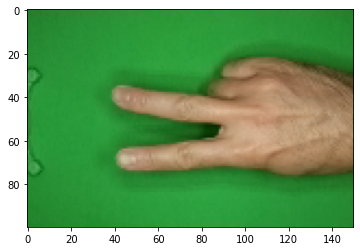

In [258]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images)
    ab = classes.astype(int)
    hs = ab.tolist()
    print('foto yang anda masukkan adalah tangan dengan bentuk :')
    if hs==[[1, 0, 0]] :
      print('batu')

    elif hs==[[0, 1, 0]] :
      print('gunting')

    elif hs==[[0, 0, 1]] :
      print('kertas')